# Machine Learning in Python

- Tools: scikit-learn (`sklearn`)
    - pre-processing
    - supervized & unsupervized
        - classification
        - regression
        - clustering
        - dimensionality reduction


For more reading on scikit-learn (`sklearn`) and machine learning in Python: https://scikit-learn.org/stable/index.html

# Machine Learning: General Steps

1. Data Partitioning
2. Feature Selection
3. Model
4. Model Assessment

## Setup

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import nltk package 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import random

# scikit-learn imports
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
# Uncomment if you need to download the NLTK English tokenizer and the stopwords of all languages
# nltk.download('punkt')
# nltk.download('stopwords')

# Example: Class Responses

## Data

In [ ]:
# read data in
df = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_ml.csv')

In [4]:
# randomly sort data frame
df = df.sample(frac=1, random_state = 200).reset_index(drop=True)
df.head()

,response,most_least
0,I have most disliked the assigned final projec...,0
1,the hands on assignments,1
2,The assignments are actually interesting and n...,1
3,Doing the project and working on the PA!,1
4,Group Project. The project that we focus on ar...,0


Randomly sorted data frame:
- for selection of training and test set
- will be approximately balanced between outcomes in each

In [5]:
# see how much data we're working with
df.shape

(632, 2)

## Prediction Task: 

**Classify text from students as 'most liked' or 'least liked'**

#### 10 Steps to Prediction:


1. Specify parameters for TF-IDF calculation
2. Calculate TF-IDF from text input (predictors)
3. Extract most or least (outcome)
4. Specify how data will be partitioned
5. Partition the data
6. Train model
7. Predict in training
8. Predict in testing
9. Assess accuracy in training
10. Assess accuracy in test set

### Data Processing

Step 1: Determine how you'll convert a collection of raw documents to a matrix of TF-IDF features.

In [6]:
# Create vectorizer & specify parameters
tfidf = TfidfVectorizer(sublinear_tf=True, #apply sublinear TF scaling
                        analyzer='word',   #specify tokenizer
                        max_features=500, # specify max # of features to include
                        tokenizer=word_tokenize)

* sublinear TF scaling - replaces term frequency (TF) with $1 + log(TF)$

Step 2: Generate matrix of TF-IDF features.

In [7]:
# Learn vocabulary and idf, return term-document matrix.
# return an array;our predictor
tfidf_X = tfidf.fit_transform(df['response']).toarray()
# take a look at the output
print(tfidf_X.shape)

print("min: " , np.min(tfidf_X),
      "mean: ", np.mean(tfidf_X),
      "max: ",  np.max(tfidf_X))

(632, 500)
min:  0.0 mean:  0.006078987929354269 max:  1.0


In [8]:
## get IDF to visuzlize
idf = tfidf.idf_
rr = dict(zip(tfidf.fit(df['response']).get_feature_names(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight.head() 

,token,weight
191,graded,6.757323
95,congress,6.757323
464,vague,6.351858
323,percent,6.351858
322,per,6.351858


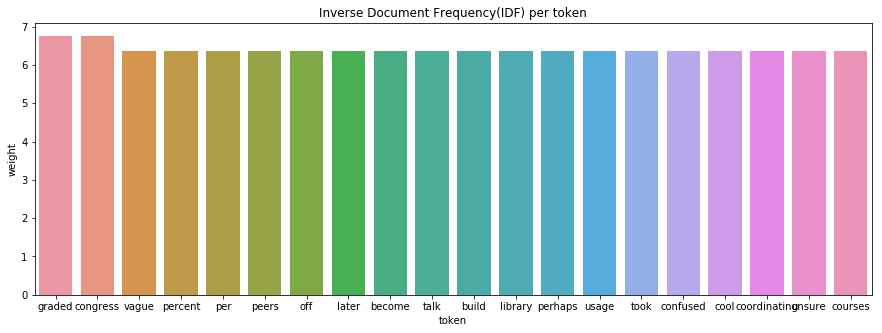

In [9]:
sns.barplot(x='token', y='weight', data=token_weight[0:20])            
plt.title("Inverse Document Frequency(IDF) per token")
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.show()

Step 3: Extract outcome variable

In [10]:
# specify outcome variable
tfidf_Y = np.array(df['most_least'])
tfidf_Y[0:5]

array([0, 1, 1, 1, 0])

## Data Partitioning & Feature Selection

80/20 split

We're going to be looking at the ability of using the text responses to predict whether or not it was something someone liked most or liked least.

Step 4: Determine split in data.

In [11]:
# specify training and test
num_training = int(len(df)*0.8)
num_testing = len(df)-num_training

print(num_training, num_testing)

505 127


Step 5: Split (partition) the data.

In [12]:
# get data
# because rows have been randomized previously
tfidf_train_X = tfidf_X[:num_training]
tfidf_train_Y = tfidf_Y[:num_training]
tfidf_test_X = tfidf_X[num_training:]
tfidf_test_Y = tfidf_Y[num_training:]

In [13]:
# take a look at the data we're using
print(tfidf_train_X.shape)
tfidf_train_X

(505, 500)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model

### SVM: Support Vector Machines

- simple & interpretable machine learning model
- based in linear regression
- classification task
- supervized
    - input: labeled training data
    - model determines hyperplane that best discriminates between categories

### SVM: Tuning Parameters
- **regularization** parameter
    - can determine how this line is drawn
    - can increase accuracy of prediction
    - can lead to overfitting of the data
- **kernel** parameter
    - specifies how to model & transform data
    

For more reading on SVMs using `sklearn`: https://scikit-learn.org/stable/modules/svm.html

### Model Generation
    

Step 6: Generate and train the model.

In [26]:
# documentation for model
SVC?

In [15]:
# function we'll use to run the model
def train_SVM(X, Y, kernel='linear'):
    clf = SVC(kernel=kernel)
    clf.fit(X, Y)
    return clf

In [16]:
# train model
df_clf = train_SVM(tfidf_train_X, tfidf_train_Y)
type(df_clf)
df_clf.

sklearn.svm.classes.SVC

### Training Data

Step 7: Predict in the training data

In [17]:
# predict on training
df_predicted_train_Y = df_clf.predict(tfidf_train_X)
print(df_predicted_train_Y[0:5])
len(df_predicted_train_Y)

[0 1 1 1 0]


505

### Testing Data

Step 8: Predict in the testing data

In [18]:
# predict on training
df_predicted_test_Y = df_clf.predict(tfidf_test_X)
print(df_predicted_test_Y[0:5])
len(df_predicted_test_Y)

[1 0 0 0 0]


127

## Accuracy Assessment

- RMSE (continuous)
- Accuracy, Sensitivity, Specificity, AUC
    - TP, TN, FP, FN

**Accuracy** - What % were predicted correctly?  
**Sensitivity (Recall)** - Of those that were positives, what % were predicted to be positive?  ; $\frac {TP}{(TP + FN)}$  
**Specificity** - Of those that were actually negatives, what % were predicted to be negative?  $\frac {TN}{(TN + FP)}$

**Precision (Positive Predictive Value, PPV)** = $\frac {TP}{(TP + FP)}$

- probability that predicted positive truly is positive

### Training Data

Step 9: Assess accuracy in training data

In [19]:
print(classification_report(tfidf_train_Y,df_predicted_train_Y))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       247
           1       0.95      0.92      0.93       258

   micro avg       0.93      0.93      0.93       505
   macro avg       0.93      0.93      0.93       505
weighted avg       0.93      0.93      0.93       505



**support** - the number of occurrences of each class  
**precision (PPV)** - ability of the classifier not to label a positive sample as negative  
**recall (sensitivity)** - ability of the classifer to find all the positive samples


**f1-score** - weighted harmonic mean of the precision and recall; score reaches its best value at 1 and worst score at 0  
**macro average** - averaging the unweighted mean per label  
**weighted average** - averaging the support-weighted mean per label  
**micro average** - averaging the total true positives, false negatives and false positives

In [20]:
# where 'support' comes from
pd.Series(tfidf_train_Y).value_counts()

1    258
0    247
dtype: int64

### Testing Data

Step 10: Assess accuracy in testing data

In [21]:
print(classification_report(tfidf_test_Y,df_predicted_test_Y))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86        59
           1       0.92      0.82      0.87        68

   micro avg       0.87      0.87      0.87       127
   macro avg       0.87      0.87      0.87       127
weighted avg       0.87      0.87      0.87       127



### Summary

1. 80:20 Partition
2. Specified TF-IDF as predictor and most/least (0,1) as outcome
3. Trained SVM linear classifier
4. Built model on Training data
5. Predicted in training data and on testing data
6. Assessed overall accuracy